In [23]:
# TODO building neural network

import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

In [24]:
import torch.nn as nn
import torch.nn.functional as F

In [28]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
# Initialize model
net = Net()

# Initialize optimizer
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])


print(net)

Model's state_dict:
fc1.weight 	 torch.Size([64, 784])
fc1.bias 	 torch.Size([64])
fc2.weight 	 torch.Size([64, 64])
fc2.bias 	 torch.Size([64])
fc3.weight 	 torch.Size([64, 64])
fc3.bias 	 torch.Size([64])
fc4.weight 	 torch.Size([10, 64])
fc4.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': None, 'params': [0, 1, 2, 3, 4, 5, 6, 7]}]
Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [31]:


EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.4572, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)


In [32]:
# check how good is network
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.981


In [16]:
import time
PATH = f"MNIST_trained_model-{int(time.time())}"
torch.save(net.state_dict(), PATH)

In [21]:
net = Net()
net.load_state_dict(torch.load(PATH))
net.eval()

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

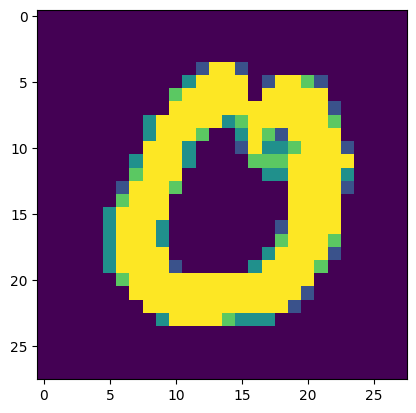

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()
           

In [9]:
print(torch.argmax(net(X[0].view(-1, 28*28))[0]))

tensor(0)
